In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_bank = pd.read_csv(r"bank-additional.csv",sep=";")

In [3]:
df_bank.shape

(4119, 21)

**observation**

1) There are 4119 rows are and 21 columns

In [4]:
df_bank.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


**observation**

1. Dataset is having numerical and categorical data

2. mixied data (Numerical+Categorical)

3. There are feature

In [5]:
df_bank = df_bank.drop('duration',axis=1)
print('Shape of dataset:',df_bank.shape)
df_bank.head()

Shape of dataset: (4119, 20)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [7]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  campaign        4119 non-null   int64  
 11  pdays           4119 non-null   int64  
 12  previous        4119 non-null   int64  
 13  poutcome        4119 non-null   object 
 14  emp.var.rate    4119 non-null   float64
 15  cons.price.idx  4119 non-null   float64
 16  cons.conf.idx   4119 non-null   float64
 17  euribor3m       4119 non-null   f

In [6]:
num_cols = df_bank.select_dtypes(exclude='object').columns
num_cols

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [7]:
cate_cols = df_bank.select_dtypes(include='object').columns
cate_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [8]:
df_bank.dtypes


age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

**observation**

1)numerical columns : age, campaign, pdays, previous, emp.var.rate,cons.price.idx, cons.conf.idx, euribor3m, nr.employed

2)categoriacl columns : job, marital, education, default, housing, loan, contact,month, day_of_week, poutcome, y

3)Data types : int64
                Object
                float64

# Categorical-Data_analysis

In [9]:
df_bank[['poutcome']]

,poutcome
0,nonexistent
1,nonexistent
2,nonexistent
3,nonexistent
4,nonexistent
...,...
4114,nonexistent
4115,nonexistent
4116,failure
4117,nonexistent


In [10]:
df_bank['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [11]:
df_bank['poutcome'].nunique()

3

In [12]:
df_bank[['y']]

,y
0,no
1,no
2,no
3,no
4,no
...,...
4114,no
4115,no
4116,no
4117,no


**observation**

**The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).**

In [13]:
unq_cnt = df_bank['y'].unique()
count_list = []
for i in unq_cnt:
    con=df_bank['y']==i
    val=len(df_bank[con])
    count_list.append(val)

In [14]:
Y_df = pd.DataFrame(zip(unq_cnt,count_list),columns=['y_data','count'])

In [15]:
Y_df

,y_data,count
0,no,3668
1,yes,451


In [16]:
df_bank['y'].value_counts()

y
no     3668
yes     451
Name: count, dtype: int64

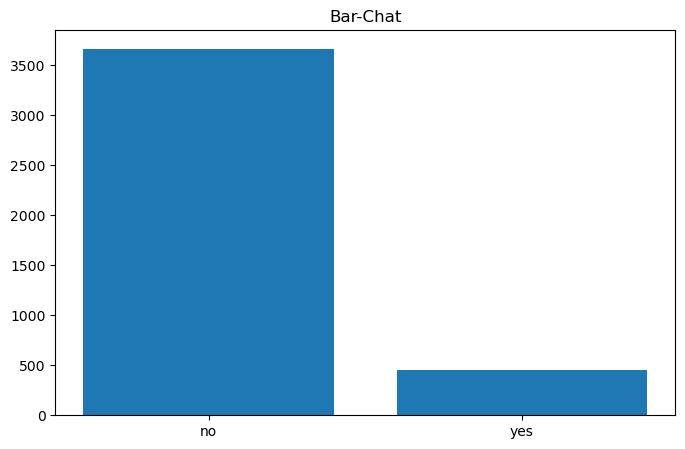

In [17]:
plt.figure(figsize=(8,5))
plt.bar('y_data','count',data=Y_df)
plt.title("Bar-Chat")
plt.show()


In [20]:
cdf = df_bank['y'].value_counts()
keys = cdf.keys()
values = cdf.values
keys,values

(Index(['no', 'yes'], dtype='object', name='y'),
 array([3668,  451], dtype=int64))

**Count-plot**

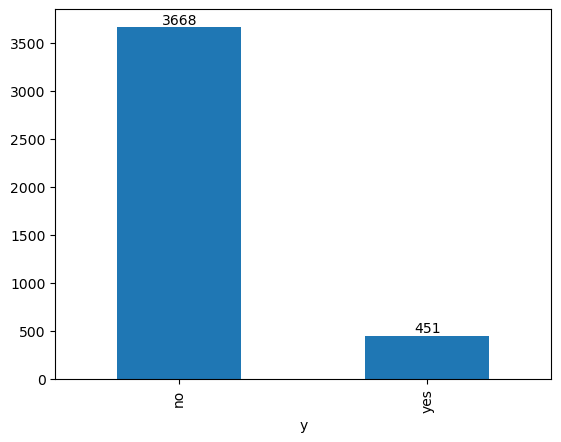

In [18]:
cdf = df_bank['y'].value_counts()
ax=cdf.plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.show()  #3668 #451


**pie_chart**

In [22]:
df_bank['y'].value_counts(normalize=True)

y
no     0.890507
yes    0.109493
Name: proportion, dtype: float64

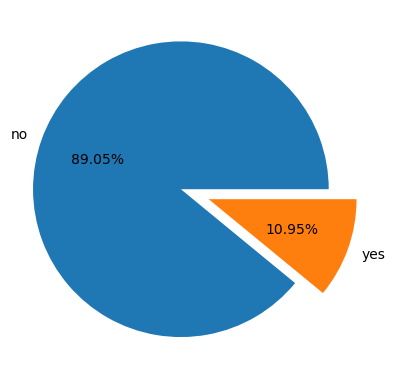

In [23]:
plt.pie(values,
       explode=[0.1,0.1],
       labels = keys,
       autopct="%0.2f%%",
       radius=1)
plt.show()

**observation**

- in pie chat yes percent is very low that mean lifting the phone call is very low

$Numerical-DataAnalysis$

In [19]:
count = round(len(df_bank['age']),2) 
min  = round(df_bank['age'].min(),2)
max = round(df_bank['age'].max(),2)
mean = round(df_bank['age'].mean(),2)
median = round(df_bank['age'].median(),2)
std = round(df_bank['age'].std(),2)
list_val = [count,mean,median,min,max,std]
index_val = ['count','mean','median','min','max','std']
pd.DataFrame(list_val,columns=['age_new'],index=index_val)

,age_new
count,4119.00
mean,40.11
median,38.00
min,18.00
max,88.00
std,10.31


In [23]:
W25_p = round(np.percentile(df_bank['age'],25),2)
W50_p = round(np.percentile(df_bank['age'],50),2)
W75_p = round(np.percentile(df_bank['age'],75),2)

print("the 25% data is ",W25_p)
print("the 50% data is ",W50_p)
print("the 75% data is ",W75_p)

the 25% data is  32.0
the 50% data is  38.0
the 75% data is  47.0


**Emperical Rule(68-95-99.7)**

**68%**

In [24]:
for i in num_cols:
    v1 = mean-1*std
    v2 = mean+1*std
    con1 = df_bank[i]>v1
    con2 = df_bank[i]<v2
    
    count1 = len(df_bank[con1&con2])
    
    
count1 ,68*4119/100

(0, 2800.92)

**95%**

In [88]:
for i in num_cols:
    v1 = mean-2*std
    v2 = mean+2*std
    con1 = df_bank[i]>v1
    con2 = df_bank[i]<v2
    
    count2 = len(df_bank[con1&con2])
count2 , 95*4119/100  

(3785, 3913.05)

**99.7**

In [89]:
for i in num_cols:
    v1 = mean-3*std
    v2 = mean+3*std
    con1 = df_bank[i]>v1
    con2 = df_bank[i]<v2
    
    count3 = len(df_bank[con1&con2])
count3 ,99.7*4119/100  

(4119, 4106.643)

In [25]:
l1 = []
num_cols = df_bank.select_dtypes(exclude='object').columns
for i in num_cols:
    count = round(len(df_bank[i]),2) 
    min  = round(df_bank[i].min(),2)
    max = round(df_bank[i].max(),2)
    mean = round(df_bank[i].mean(),2)
    median = round(df_bank[i].median(),2)
    std = round(df_bank[i].std(),2)
    W25_p = round(np.quantile(df_bank[i],0.25),2)
    W50_p = round(np.quantile(df_bank[i],0.50),2)
    W75_p = round(np.quantile(df_bank[i],0.75),2)
    l1.append([count,min,max,mean,median,std,W25_p,W50_p,W75_p])
index_val = ['count','min','max','mean','median','std','25%','50%','75%']
df =pd.DataFrame(l1,columns=index_val,index= num_cols).T
df
    

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.00,4119.00,4119.00,4119.00,4119.00,4119.00,4119.00,4119.00,4119.00
min,18.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.64,4963.60
max,88.00,35.00,999.00,6.00,1.40,94.77,-26.90,5.04,5228.10
mean,40.11,2.54,960.42,0.19,0.08,93.58,-40.50,3.62,5166.48
median,38.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00
std,10.31,2.57,191.92,0.54,1.56,0.58,4.59,1.73,73.67
25%,32.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.33,5099.10
50%,38.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00
75%,47.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10


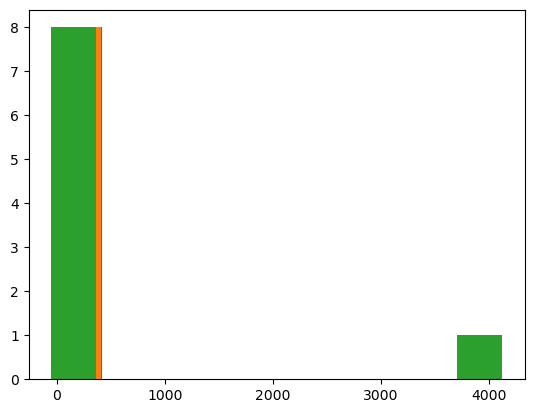

In [30]:
plt.hist(df['age'])
plt.hist(df['campaign'])
plt.hist(df['cons.conf.idx'])
plt.show()

# Histogram_plot

<Axes: xlabel='nr.employed', ylabel='Count'>

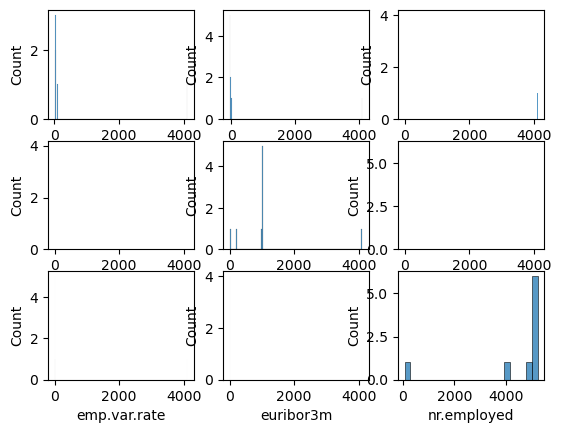

In [91]:
fig, axes = plt.subplots(3, 3)
sns.histplot(data=df, x='age', ax=axes [0,0])
sns.histplot(data=df, x='cons.conf.idx', ax=axes [0,1])
sns.histplot(data=df, x='cons.price.idx', ax=axes [0,2])
sns.histplot(data=df, x='campaign', ax=axes[1,0])
sns.histplot(data=df, x='pdays', ax=axes[1,1])
sns.histplot(data=df, x='previous', ax=axes[1,2])
sns.histplot(data=df, x='emp.var.rate', ax=axes[2,0])
sns.histplot(data=df, x='euribor3m', ax=axes[2,1])
sns.histplot(data=df, x='nr.employed', ax=axes[2,2])


# Distribution-plot

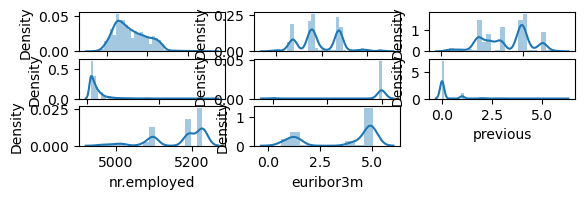

In [9]:
import warnings
warnings.filterwarnings("ignore")
plt.subplot(8,3,1)
sns.distplot(df_bank['age'])
plt.subplot(8,3,2)
sns.distplot(df_bank['cons.conf.idx'])
plt.subplot(8,3,3)
sns.distplot(df_bank ['cons.price.idx'])
plt.subplot(8,3,4)
sns.distplot(df_bank['campaign'])
plt.subplot(8,3,5)
sns.distplot(df_bank['pdays'])
plt.subplot(8,3,6)
sns.distplot(df_bank['previous'])
plt.subplot(8,3,7)
sns.distplot(df_bank['nr.employed'])
plt.subplot(8,3,8)
sns.distplot(df_bank['euribor3m'])
plt.savefig('fname')




# finding the outlier

In [30]:
num_cols

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

**Outlier data**

In [79]:
outlier,nonoutlier=[],[]
cols=df_bank.select_dtypes(exclude="object").columns

for i in cols:
    q1=np.percentile(df_bank[i],25)
    q3=np.percentile(df_bank[i],75)
    lb=q1-1.5*(q3-q1)
    ub=q3+1.5*(q3-q1)
    con1=df_bank[i]<lb
    con2=df_bank[i]>ub
    outlier.append(len(df_bank[con1 | con2]))
    con3=df_bank[i]>lb
    con4=df_bank[i]<ub
    nonoutlier.append(len(df_bank[con3 | con4]))
pd.DataFrame(zip(outlier,nonoutlier),index=cols,columns=["No_of_Outliers","No_of_Non-outliers"])



,No_of_Outliers,No_of_Non-outliers
age,39,4119
campaign,235,4119
pdays,160,160
previous,596,596
emp.var.rate,0,4119
cons.price.idx,0,4119
cons.conf.idx,43,4119
euribor3m,0,4119
nr.employed,0,4119


**BOX-PLOT**

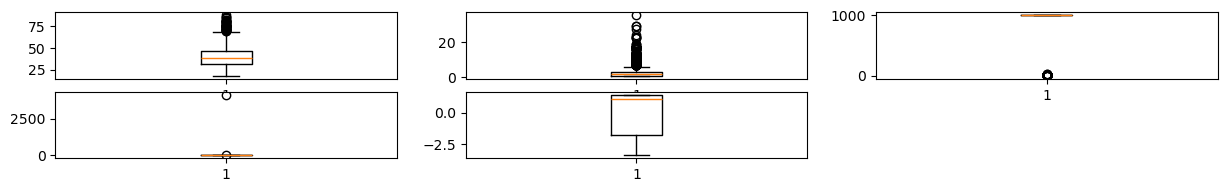

In [92]:
plt.figure(figsize=(15,5))
plt.subplot(5,3,1).boxplot(df_bank['age'])
plt.subplot(5,3,2).boxplot(df_bank['campaign'])
plt.subplot(5,3,3).boxplot(df_bank['pdays'])
plt.subplot(5,3,4).boxplot(df['previous'])
plt.subplot(5,3,5).boxplot(df_bank['emp.var.rate'])
plt.show()
                           



**Obeservation**

1.Bank deposit product subscribed by 451 people out of 4119

2.Bank desposit product not subscribed by 3668 people out of 4119

3.Not subscibed count is greater then the subscription so this dataset is Imbalaced data 

In [112]:
df_bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [113]:
num_cols

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [114]:
cate_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [115]:
df_bank['job'].value_counts()

job
admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: count, dtype: int64

In [116]:
df_bank['y'].value_counts()

y
no     3668
yes     451
Name: count, dtype: int64

# correlation Plot

<Axes: >

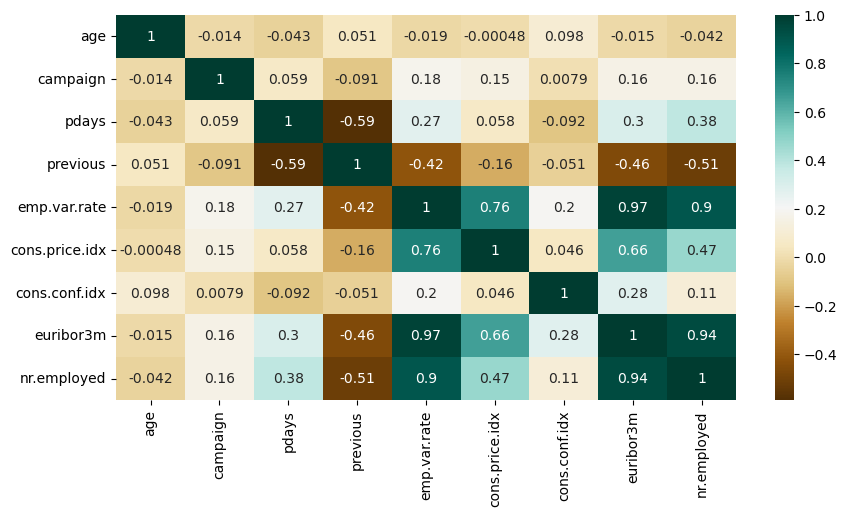

In [118]:
plt.figure(figsize=(10,5))
c = df_bank.corr(numeric_only=True)
sns.heatmap(c,cmap="BrBG",annot=True)

# stradardization of dataset

In [122]:
from sklearn.preprocessing import StandardScaler
df_bank_num = df_bank.copy()
scaler = StandardScaler()
num_cols = ['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
df_bank_num[num_cols] = scaler.fit_transform(df_bank[num_cols])
df_bank_num = df_bank_num.drop(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','month', 'day_of_week', 'poutcome', 'y'],axis=1)
df_bank_num.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,-0.980752,-0.209228,0.201031,-0.351356,-1.206054,-1.185448,-1.240939,-1.331707,-0.914779
1,-0.107991,0.569634,0.201031,-0.351356,0.649441,0.715193,0.892269,0.711698,0.332862
2,-1.465619,-0.598660,0.201031,-0.351356,0.841389,1.528273,-0.283172,0.773427,0.836535
3,-0.204965,0.180203,0.201031,-0.351356,0.841389,1.528273,-0.283172,0.771697,0.836535
4,0.667795,-0.598660,0.201031,-0.351356,-0.118350,-0.655478,-0.326707,0.328632,0.398028


# Encode Categorical Features

In [131]:
cate_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [130]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
encoder =  OneHotEncoder(sparse=False)
df_bank_targ = df_bank.copy()
df_bank_targ = df_bank_targ.drop(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'], axis=1)
df_bank_targ['y'] = df_bank_targ['y'].apply(lambda x: 1 if x == 'yes' else 0)
df_bank_targ.head(15)


,y
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [135]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
encoder =  OneHotEncoder(sparse=False)
cate_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','month', 'day_of_week', 'poutcome',]
df_bank_catg = df_bank.copy()
df_bank_catg.head()
df_encoder = pd.DataFrame(encoder.fit_transform(df_bank_catg[cate_cols]))
df_encoder.columns = encoder.get_feature_names_out(cate_cols)
df_bank_catg = df_bank_catg.drop(cate_cols,axis=1)
df_bank_catg = pd.concat([df_bank_num,df_encoder,df_bank_targ],axis=1)
print('shape of dataframe:',df_bank_catg.shape)
df_bank_catg.head()


shape of dataframe: (4119, 63)


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y
0,-0.980752,-0.209228,0.201031,-0.351356,-1.206054,-1.185448,-1.240939,-1.331707,-0.914779,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,-0.107991,0.569634,0.201031,-0.351356,0.649441,0.715193,0.892269,0.711698,0.332862,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,-1.465619,-0.598660,0.201031,-0.351356,0.841389,1.528273,-0.283172,0.773427,0.836535,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
3,-0.204965,0.180203,0.201031,-0.351356,0.841389,1.528273,-0.283172,0.771697,0.836535,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,0.667795,-0.598660,0.201031,-0.351356,-0.118350,-0.655478,-0.326707,0.328632,0.398028,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [162]:
df_bank = pd.read_csv(r"bank-additional.csv",sep=";")

In [167]:
num_cols

['age',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [93]:
cate_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')